# Gmail Smart Compose

# 1. Business Problem

## 1.1. Description
Source of data - https://www.kaggle.com/datasets/wcukierski/enron-email-dataset

AS we all know about the E-mail, the E-mail continues to be a ubiquitous and growing form of communication all over the world, with an estimated 3.8 billion users sending 281 billion e-mails daily.

All you have experienced the Gmail smart compose, maybe even without knowing you all are actually using the Gmail smart compose
in daily life. Maybe you notice when typing an email, sometimes Gmail suggests the relevant or relevant sentences, this is nothing but Gmail smart compose.

#### Problem statement : 
So here is the task we have to make a model, which can predict the sentences or words based on the given sentence or some words. the input is a sequence of words and the output is also a sequence of words, so we have to build the sequency-based model. 

## 1.2. Source/Useful Links
Some articles and reference blogs about the problem statement

Blog 1 https://arxiv.org/pdf/1906.00080.pdf - This is the main research paper on the implementation of Smart Gmail Compose.

Blog 2  https://towardsdatascience.com/gmail-style-smart-compose-using-char-ngram-language-models-a73c09550447

Blog 3 https://blog.jiayihu.net/gmail-smart-compose-in-keras-and-tensorflow-js/ 

## 1.3. Data Information
For this task, our data is Gmail conversation-based data.

The dataset we use is The Enron Email Dataset, and the dataset contains 500,000+ emails from 150 employees of the Enron Corporation.It was obtained by the Federal Energy Regulatory Commission during its investigation of Enron's collapse.

Link of dataset https://www.kaggle.com/datasets/wcukierski/enron-email-dataset

# 2 Problem Formulation

Sequence and language modeling task

So here our input and output are the sequences of words and we have to predict the sequence of words given the input of sentences.

Here the use of a Neural network-based model is preferable to the simple
machine learning model, the task is a sequence-based task, so we can use
sequence-to sequence-based models like LSTM, and GRU, and also we can use
Encode decoder based model. 

To create the data we can use the  character n-gram like this,  let
suppose we have the one sentence ‘here is our mail’ so our x_train and y_train
look like this, 

    x_train           y_train
    h                 ere is our mail
    he                re is our mail
    her               e is our mail
    here              is our mail
    here i            s our mail
    here is           our mail 


# 3 Performance Metrics
As the performance metrics, we use the BLEU (Bilingual Evaluation Understudy) score, it is a score for comparing a candidate translation of text to one or more reference translations more about https://machinelearningmastery.com/calculate-bleu-score-for-text-python/

<p>It is quick and inexpensive to calculate.<br> 
It is easy to understand.<br>
It is language independent.<br>
It correlates highly with human evaluation.<br>
It has been widely adopted.</p>

Main research paper use the perplexity as the performance matrix, perplexity metric in NLP is a way to capture the degree of ‘uncertainty’ a model has in predicting (assigning probabilities to) some text. 


## Import Libraries

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
import email
import seaborn as sns
import scipy

In [4]:
#read the data
data = pd.read_csv('/content/drive/MyDrive/case study 2/emails.csv')

In [5]:
data.head()

,file,message
0,allen-p/_sent_mail/1.,Message-ID: <18782981.1075855378110.JavaMail.e...
1,allen-p/_sent_mail/10.,Message-ID: <15464986.1075855378456.JavaMail.e...
2,allen-p/_sent_mail/100.,Message-ID: <24216240.1075855687451.JavaMail.e...
3,allen-p/_sent_mail/1000.,Message-ID: <13505866.1075863688222.JavaMail.e...
4,allen-p/_sent_mail/1001.,Message-ID: <30922949.1075863688243.JavaMail.e...


In [6]:
data.shape

(517401, 2)

In [7]:
print(data.message.values[180])

Message-ID: <22766758.1075855690869.JavaMail.evans@thyme>
Date: Fri, 26 May 2000 00:08:00 -0700 (PDT)
From: phillip.allen@enron.com
To: stagecoachmama@hotmail.com
Subject: Re: Todays update
Mime-Version: 1.0
Content-Type: text/plain; charset=us-ascii
Content-Transfer-Encoding: 7bit
X-From: Phillip K Allen
X-To: "Lucy Gonzalez" <stagecoachmama@hotmail.com> @ ENRON
X-cc: 
X-bcc: 
X-Folder: \Phillip_Allen_Dec2000\Notes Folders\'sent mail
X-Origin: Allen-P
X-FileName: pallen.nsf

Lucy,
 I am going to be in Seguin this Saturday through Monday.  We can talk about 
a unit for Wade then.  I will call the bank again today to resolve 
authorization on the account.  Lets keep the office open until noon on 
Memorial day.

Philllip


#### Obs
Our mail contains many things like, message id, date, time, subject, etc.

When we clean the data we have to care about the
privacy,
because mail can contain the user's phone number, account number, etc.

here we only need only message and, the rest of all things we remove from the data

And here we have the total number of data points are 517401

# 4 Exploratory Data Analysis(EDA)

In [8]:
message = data.message.values[180]
e = email.message_from_string(message)
e.items()

[('Message-ID', '<22766758.1075855690869.JavaMail.evans@thyme>'),
 ('Date', 'Fri, 26 May 2000 00:08:00 -0700 (PDT)'),
 ('From', 'phillip.allen@enron.com'),
 ('To', 'stagecoachmama@hotmail.com'),
 ('Subject', 'Re: Todays update'),
 ('Mime-Version', '1.0'),
 ('Content-Type', 'text/plain; charset=us-ascii'),
 ('Content-Transfer-Encoding', '7bit'),
 ('X-From', 'Phillip K Allen'),
 ('X-To', '"Lucy Gonzalez" <stagecoachmama@hotmail.com> @ ENRON'),
 ('X-cc', ''),
 ('X-bcc', ''),
 ('X-Folder', "\\Phillip_Allen_Dec2000\\Notes Folders\\'sent mail"),
 ('X-Origin', 'Allen-P'),
 ('X-FileName', 'pallen.nsf')]

In [9]:
e.get_payload()

'Lucy,\n I am going to be in Seguin this Saturday through Monday.  We can talk about \na unit for Wade then.  I will call the bank again today to resolve \nauthorization on the account.  Lets keep the office open until noon on \nMemorial day.\n\nPhilllip'

As a first step here we remove the subject, and user mail id and we take only the messages from the data.
to do this step we use the email library.

Basically, the email library converts the whole mail into a list of tuples and takes only those tuples that contain the message.

In [10]:
#extract the message from the mail
mail = []
for i in tqdm(data.message.values):
  e = email.message_from_string(i)
  mail.append(e.get_payload())

100%|██████████| 517401/517401 [01:22<00:00, 6282.54it/s]


In [11]:
#count the length of the message
data['mail'] = mail
data['len']  = list(data['mail'].apply(lambda x:len(x)))

In [13]:
data.describe()

,len
count,5.174010e+05
mean,1.845373e+03
std,8.181162e+03
min,1.000000e+00
25%,2.880000e+02
50%,7.700000e+02
75%,1.757000e+03
max,2.011422e+06


Here the mean value is 1845 which means most data point has an 1845 length of the message

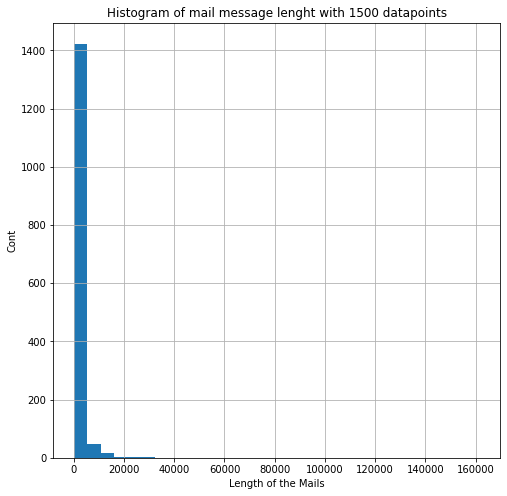

In [14]:
x_1 = data.len.sample(1500)
plt.figure(figsize=(8,8))
plt.hist(x_1,bins = 30)
plt.title("Histogram of mail message lenght with 1500 datapoints")
plt.xlabel("Length of the Mails")
plt.ylabel("Cont")
plt.grid()

Let's do some first basic EDA on the length of the message

Here we take the random 1500 mail and we plot the histogram of the length of mail.

From the histogram, we can say there are many mail messages where the length of the message is between 1000 to 10000 and a very small part of the message where the length message is above the 30000.

I think is very long message is not adding much more value to our study so we remove all these types of the message from the data.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


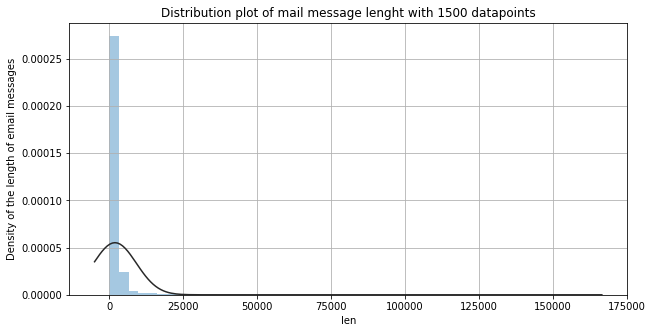

In [15]:
from scipy import stats
sample = x_1
plt.figure(figsize=(10,5))
plt.title("Distribution plot of mail message lenght with 1500 datapoints")
plt.ylabel('Density of the length of email messages')
plt.grid()
ax = sns.distplot(sample, kde=False, fit=stats.norm)

Here we take the same sample as above, and we plot the distribution of the mail message length, the distribution falls down very sharply and the tail of the distribution is very long.

so we can say here the more message length is between the 0 to 10k and very less point has a length of more than the 10k.

In [16]:
import numpy as np
a = data.len.values
for i in range(5 , 105,5):
    p = np.percentile(a, i)
    print('{} Percentile value is {}'.format(i,p))

5 Percentile value is 58.0
10 Percentile value is 109.0
15 Percentile value is 167.0
20 Percentile value is 221.0
25 Percentile value is 288.0
30 Percentile value is 361.0
35 Percentile value is 447.0
40 Percentile value is 539.0
45 Percentile value is 647.0
50 Percentile value is 770.0
55 Percentile value is 905.0
60 Percentile value is 1067.0
65 Percentile value is 1251.0
70 Percentile value is 1465.0
75 Percentile value is 1757.0
80 Percentile value is 2146.0
85 Percentile value is 2706.0
90 Percentile value is 3657.0
95 Percentile value is 5909.0
100 Percentile value is 2011422.0


In [17]:
for i in range(90 , 101,1):
    p = np.percentile(a, i)
    print(i,' percentile value is',p)

90  percentile value is 3657.0
91  percentile value is 3946.0
92  percentile value is 4303.0
93  percentile value is 4746.0
94  percentile value is 5282.0
95  percentile value is 5909.0
96  percentile value is 6792.0
97  percentile value is 8185.0
98  percentile value is 10674.0
99  percentile value is 16229.0
100  percentile value is 2011422.0


In [18]:
for i in np.arange(0.1, 1.1, 0.1):
    b = (99+i)/100* 100
    p = np.percentile(a, b)
    print(b,' percentile value is',p)

99.1  percentile value is 17646.000000000233
99.2  percentile value is 19156.0
99.3  percentile value is 20754.0
99.4  percentile value is 23214.0
99.5  percentile value is 27195.0
99.6  percentile value is 31196.800000000396
99.7  percentile value is 36641.0
99.8  percentile value is 51085.0
99.9  percentile value is 83929.20000001404
100.0  percentile value is 2011422.0


Here we  find the percentile values of the mail message length,

In the first section, we find the 5 to 100 percentile values and the 5 percentile value is 58 which means the 5 percent data has a length is 58, but the 95 to 100 percentile values increase the very fast, so let's zoom the values of 95 to 100 percentile values.

In the second, we take the 90 to 100 percentile values and we show that the 99 percent data length is 16k but in 99 to 100 percent value increases very fast, so we zoom further,

In the third section we take the 99 to 100 percentile values and the message length increase very fast so here we take only 5 to 95 percentile values and the rest of the data we remove from the dataset

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


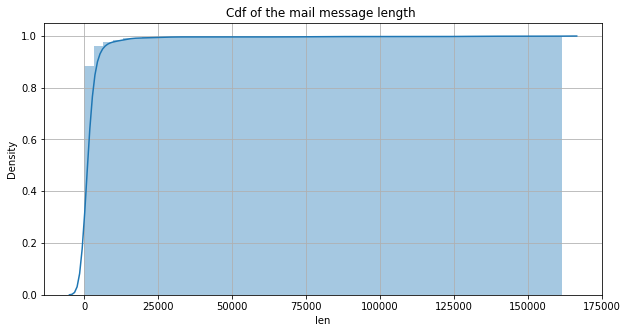

In [26]:
sample = x_1
plt.figure(figsize=(10,5))
plt.title("Cdf of the mail message length ")
ax = sns.distplot(sample, hist_kws=dict(cumulative=True), kde_kws=dict(cumulative=True))
plt.grid()

From the CDF we can say that 99% of the data mail message length is less than the 10k

In [20]:
#removing further data points based on the 5th and 95th percentile values
data_ = data[(data.len > 58.0) & (data.len< 5909.0)]

In [21]:
data_.shape

(465083, 4)

After the removing unwanted data we have the total number of data points are 465083

In [22]:
data_.describe()

,len
count,465083.000000
mean,1179.354829
std,1179.732833
min,59.000000
25%,325.000000
50%,771.000000
75%,1601.000000
max,5908.000000


After the removing the unwanted data points the mean value is 1179

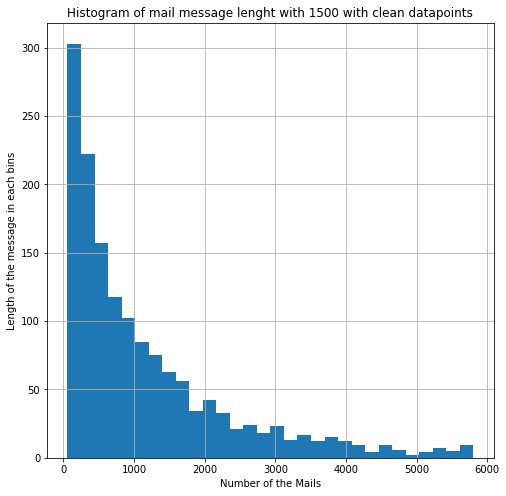

In [23]:
x_2 = data_.len.sample(1500)
plt.figure(figsize=(8,8))
plt.hist(x_2,bins = 30)
plt.title("Histogram of mail message lenght with 1500 with clean datapoints")
plt.xlabel("Number of the Mails")
plt.ylabel("Length of the message in each bins")
plt.grid()

After the removal of the unwanted mail message length, our histogram looks very clear and most of the mail message length is less than the 3000

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


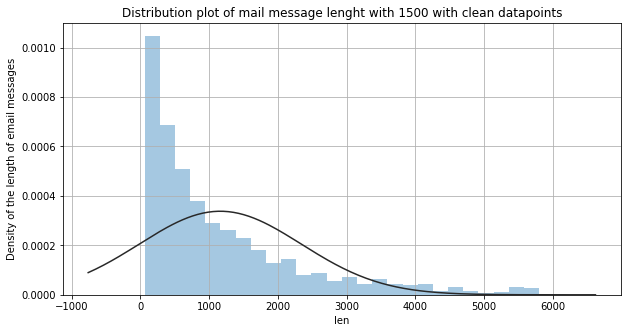

In [24]:
sample = x_2
plt.figure(figsize=(10,5))
plt.title("Distribution plot of mail message lenght with 1500 with clean datapoints")
plt.ylabel('Density of the length of email messages')
plt.grid()
ax = sns.distplot(sample, kde=False, fit=stats.norm)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


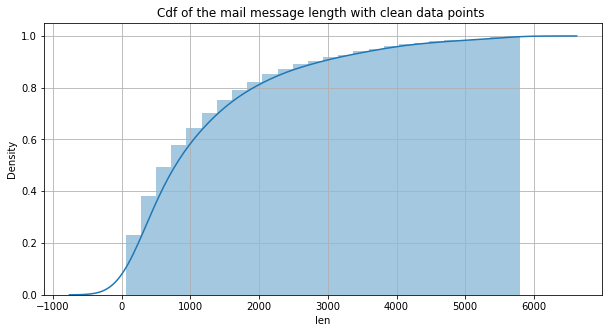

In [27]:
sample = x_2
plt.figure(figsize=(10,5))
plt.title("Cdf of the mail message length with clean data points ")
ax = sns.distplot(sample, hist_kws=dict(cumulative=True), kde_kws=dict(cumulative=True))
plt.grid()

From the CDF we can say that 99% of the data mail message length is less than the 5000

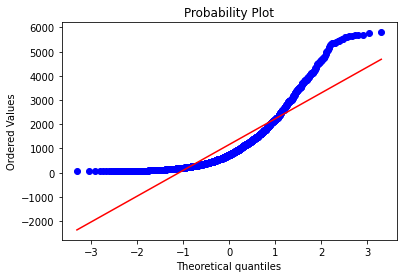

In [30]:
#Q-Q plot for checking if the mail message length is normal distribution
scipy.stats.probplot(sample, plot=plt)
plt.show()

From the Q-Q plot, we can say the length of the message is not follow the normal distribution